In [457]:
def str_array2floats(strarray):
    floats=[]
    for s in strarray:
        try:
            floats.append(float(s))
        except:
            floats.append(np.nan)
    return floats
# Modules and data loading
import numpy as np
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import re
import math
from scipy.interpolate import griddata,interp2d
# import mpl_toolkits.mplot3d.art3d.Poly3DCollection
from   mpl_toolkits.mplot3d.art3d import Poly3DCollection
sys.path.append('..')
from pickle_fns import *
base_folder=r'D:\Ameyem Office\Projects\Electric surveys\Easwar files\jalaun\\'
base_folder=r'D:\Ameyem Office\Projects\Electric surveys\Easwar files\Mahoba\\'
vesdf,data_dfs=load_pkl(base_folder+'vesdf_datadf.pkl')
# vesdf,data_dfs=load_pkl('tikamgarh.pkl')
E,N,Ele=vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float),str_array2floats(vesdf.RL.values)
# Ele=[float(re.findall('\d*\.\d+|\d+',E)[0]) for E in Ele]
# E,N,data_dfs[0]

In [458]:


# # 'ab'.upper()
data_dfs[0]
# locdf

,Layer No.,Resistivity(Ωm),Thickness(m),Depth (m),Elev.,Interpreted Lithology
0,1,18.507,0.80102,0.80102,238.20,Dry soil with kankar
1,2,1.4835,0.38112,1.1821,237.82,Clay with kankar
2,3,572.27,0.62656,1.8087,237.19,Clay with kankar
3,4,72.845,0.26081,2.0695,236.93,Clay with kankar
4,5,9691.7,--,--,--,Hard massive granite


In [459]:
file='Copy of Mohaba Drilling information-ed.xlsx'
file='siri work (total drilling data).xlsx'
locdf =pd.read_excel(base_folder+file,'other')
drill_lith_df =pd.read_excel(base_folder+file,'Layer')
locdf.Location=[l.upper() for l in locdf.Location]
# locdf[locdf.Location==loc]['RL.NO'].iloc[0]
# locdf, drill_lith_df
# drill_lith_df

In [460]:
# vesdf.columns,locdf.columns
dvesdf

,Easting,Northing,VES No.,Block,Location,Distt,RL
0,79.41588,25.14633,0,Mohaba Block,BAGHAURA,Mohaba,228.00
1,79.61752,25.44897,1,Mohaba Block,GAURIHARI,Mohaba,171.00
2,79.66600,25.23109,2,Mohaba Block,BAGWAHA,Mohaba,225.00
3,79.41397,25.42003,3,Mohaba Block,BAINDO,Mohaba,178.60
4,79.84420,25.45128,4,Mohaba Block,BAMHORI KALAN,Mohaba,163.00
5,79.47647,25.21437,5,Mohaba Block,BHAGAURA-JAILWARA,Mohaba,202.00
6,79.33585,25.37476,6,Mohaba Block,DHARWAR,Mohaba,180.00
7,79.41633,25.04525,7,Mohaba Block,DHORRA,Mohaba,231.00
8,79.67763,25.44871,8,Mohaba Block,GUDHA,Mohaba,160.00
9,79.84086,25.40730,9,Mohaba Block,IMILIYA DANG,Mohaba,161.00


In [461]:
# 
# vesdf,
dvesdf=pd.DataFrame()
dvesdf['Easting']=locdf.Easting
dvesdf['Northing']=locdf.Northing
dvesdf['VES No.']=np.arange(len(locdf))
dvesdf['Block']='Mohaba Block'
dvesdf['Location']=locdf.Location
dvesdf['Distt']='Mohaba'
dvesdf['Distt']='Mohaba'
dvesdf['RL']=locdf['RL.NO']

In [462]:
# locdf[locdf.Location==loc]['RL.NO'].iloc[0],a[-1]

In [463]:
# np.unique(drill_lith_df.LITHOLOGY.values)
locations=np.unique(drill_lith_df.Location.values)
drill_dfs=[]
for loc in locations:
#     print(drill_lith_df[drill_lith_df.Location==loc].values)
    data=[]
    for a in drill_lith_df[drill_lith_df.Location==loc].values:
#         print(a)
#         print(locdf[locdf.Location==loc]['RL.NO'].iloc[0] )
        
        data.append([a[1], 0, a[-1], a[-3], locdf[locdf.Location==loc]['RL.NO'].iloc[0]-a[-1], a[2]])
#         break
#     drill_lith_df[drill_lith_df.Location==loc]
    data.append([a[1]+1, 0, '--', '--', '--', 'Final Layer'])
    drill_dfs.append(pd.DataFrame(data, columns=data_dfs[0].columns))
save_pkl(base_folder+'dvesdf_datadf.pkl',(dvesdf,drill_dfs))
drill_dfs[0]

,Layer No.,Resistivity(Ωm),Thickness(m),Depth (m),Elev.,Interpreted Lithology
0,1,0,5.64,0,222.36,Soil with clay
1,2,0,5.94,5.64,222.06,Course sand
2,3,0,19.75,11.58,208.25,Weathered pink granite
3,4,0,19.75,31.33,208.25,pink granite(hard and compact)
4,5,0,45.12,33.69,182.88,pink granite slightly black fine to medium
5,6,0,124.04,78.81,103.96,Pink granite compressively less mafic
6,7,0,--,--,--,Final Layer


In [464]:
drill_dfs[0]

,Layer No.,Resistivity(Ωm),Thickness(m),Depth (m),Elev.,Interpreted Lithology
0,1,0,5.64,0,222.36,Soil with clay
1,2,0,5.94,5.64,222.06,Course sand
2,3,0,19.75,11.58,208.25,Weathered pink granite
3,4,0,19.75,31.33,208.25,pink granite(hard and compact)
4,5,0,45.12,33.69,182.88,pink granite slightly black fine to medium
5,6,0,124.04,78.81,103.96,Pink granite compressively less mafic
6,7,0,--,--,--,Final Layer


In [465]:
drill_dfs
nlayers=max([len(d) for d in drill_dfs])
all_liths=[[]]*nlayers
all_liths=[]
for i in range(nlayers):
    all_liths.append([])
for df in drill_dfs:
    for i in range(len(df['Interpreted Lithology'])):

        all_liths[i].append(df['Interpreted Lithology'].iloc[i])
#         break
#     break
all_liths 

uall_liths=[np.unique(a) for a in all_liths]
[len(a) for a in all_liths],[len(a) for a in uall_liths],uall_liths
ualiths=[]
for u in uall_liths:
    ualiths.extend(u)
len(ualiths ),len(np.unique(ualiths) ),np.unique(ualiths) 

def find_not_in_lithDict(all_unique_liths,lith_dict):
    all_lith=[]
    for j in lith_dict:
        all_lith.extend(lith_dict[j] )
    to_be_included=[]
    for l in all_unique_liths:
        if not l in all_lith:
            to_be_included.append(l)
    return to_be_included
find_not_in_lithDict(np.unique(ualiths),get_lithdict()) 

[]

In [466]:
def get_lithdict():
    top_soil_kankars=[
            'Course sand',
            'Kankar mix sand', 
            'Soil with clay', 'Soil with kankar ', 
            'alluvim boil', 'black soil with kankar ', 'clay with  kankar',
            'clay with kankar', 'clay with kankar ', 'clay with quartz',
            'clay with weathered quartz','quartz little black',
     'soil with weathered granite',
     'sticky clay with quartz ',
     'sticky yellowish clay with quartz',
     'top soil  with clay',
     'top soil with clay',
     'top soil with kankar',
     'top soil with sticky clay',

     'yellowish sandy clay'  ]
    weathered_granite=['weathered course size pink granite',
            'weathered gray granite', 'weathered pink granite',
            'weathered pink granite and touldes formation',
            'weathered pink granite medium grain',
            'weathered pink granite slightly green','Weathered pink granite',
                      ]
    pink_granite_slighly_black=['whitish pink granite coasse grain little black','pink granite boulder couse grain',
     'pink granite fine chips',
     'pink granite fine grain',
     'pink granite fine grain size',
     'pink granite fine to medium grain',
     'pink granite hard and compect',
     'pink granite hard compact',
     'pink granite in mafice mineral increase',
     'pink granite little black',
     'pink granite little black medium chips',
     'pink granite loose formation',
     'pink granite mafic mineral increase',
     'pink granite mafic mineral increased ',
     'pink granite mafic mineral increse',
     'pink granite marfic mineral increase',
     'pink granite massive mineral increase ',
     'pink granite massive mineral increse',
     'pink granite mud to fine graines black',' pink granite little black fine chips',
                                'Pink granite compressively less mafic','pink granite slightly black',
            'pink granite slightly black ,white fine formation',
            'pink granite slightly black ,whitish causse grain',
            'pink granite slightly black fine grain',
            'pink granite slightly black fine to medium',
            'pink granite slightly black fine to mud',
            'pink granite slightly black granite',
            'pink granite slightly black mud chip',
            'pink granite slightly black, white fine to medium',
            'pink granite slightly black, whitish cuasse',
            'pink granite very fine grain', 'pink granite very hard',
            'pink granite with coarse to fine grain',
            'pink granite with fine grain', 'pink granite(hard and compact)',
            'pink graniteloss formation', 'pink whitish granite medium grain',
            'pinkgranite medium grain', 'pinkish granite medium grain',
             'pure pink granite',
            'pure pink granite fine to medium chips',
            'pure pink granite slightly white medium gas',
            'pure pink granite slightly white medium gas ','quartz and feldspar dominant pink granite',]
    grey_granite=['dolarite fine grain',
            'dolarite fine to medium chip',
                  '20%pink and 80% grey granite', 'very hard and compact grey ','pure black granite fine grain ',
                   'gray granite marfic intrusion',
            'gray granite with marfic mineral increased',
            'grey granite  little pink course grain',
            'grey granite  mafic mineral increase',
            'grey granite (hard and compact)',
            'grey granite ,whitish coasse grain',
            'grey granite coarse gain chips',
            'grey granite finre to medium grain', 'grey granite harded compect',
            'grey granite mafic intrusion hard and compect',
            'grey granite mafic mineral increase',
            'grey granite mafic mineral increased',
            'grey granite marfic mineral increase', 'grey granite medium grain',
            'grey granite pink medium grain', 'grey granite slaightly pink',
            'grey granite slightly white coosse grain',
            'grey granite slightly whitish',
            'grey granite white ,slightly pink coasse grain',
            'grey granite whitish coasse grain',
            'grey granite with mafic increased',
            'grey whitish granite coarse grain',
            'hard gray granite with feldspar', 'm fine to coarse green sand',
            'marfic mineral incresed gray granite','very hard and compact grey ',
            'very hard gray  granite',
                 ]
    final_layer=[ 'Final Layer',]
    lith_dict={0:top_soil_kankars,1:weathered_granite,2:pink_granite_slighly_black,3:grey_granite,4:final_layer}
    return lith_dict
def find_not_in_lithDict(all_unique_liths,lith_dict):
    all_lith=[]
    for j in lith_dict:
        all_lith.extend(lith_dict[j] )
    to_be_included=[]
    for l in all_unique_liths:
        if not l in all_lith:
            to_be_included.append(l)
    return to_be_included
find_not_in_lithDict(np.unique(ualiths),get_lithdict())       


[]

In [467]:
dlith_dict=get_lithdict()
save_pkl(base_folder+'dlith_dict.pkl',dlith_dict)

In [468]:
# get_lithdict()
# save_pkl(base_folder+)
# def get_data4VES_panel_frm_2sets(vesdf,data_dfs,lith_dict,locations4panel,dvedf,drill_dfs,dlith_dict,dlocations4panel,max_strata_thickness=400):
#     lithologies,resistivities,thicknesses,lith_lbls,vess,loc_heads
#     = get_data4VES_panel(vesdf,data_dfs,lith_dict,locations4panel,max_strata_thickness=400)
#     dlithologies,dresistivities,dthicknesses,dlith_lbls,dvess,dloc_heads
#     = get_data4VES_panel(dvesdf,drill_dfs,dlith_dict,dlocations4panel,max_strata_thickness=400)
    
base_folder=r'D:\Ameyem Office\Projects\Electric surveys\Easwar files\Mahoba\\'
vesdf,data_dfs=load_pkl(base_folder+'vesdf_datadf.pkl')
dvesdf,drill_dfs=load_pkl(base_folder+'dvesdf_datadf.pkl')


# vesdf,data_dfs=load_pkl('tikamgarh.pkl')
lith_dict=load_pkl(base_folder+'lith_dict.pkl')
dlith_dict=load_pkl(base_folder+'dlith_dict.pkl')
vesnos=vesdf['VES No.'].values
# print(vesnos)
nlocs=4
dlocations4panel=[0];file1='test1.jpg'
locations4panel=['122'];
# locations4panel=['187', '184', '175', '146', '136', '148', '112', '122', '113', '158', '155', '164', '154'];file1='test2.jpg'

# figsize=4*len(locations4panel[0:nlocs]),10

# # locations4panel=['669','670', '668', '661', '662']
# plt=plot_VES_panel(vesdf,data_dfs,lith_dict,locations4panel[0:nlocs],figsize)
# plt.savefig(file1, dpi=150)
# plt.show()


In [469]:

# lithologies,dlithologies
# resistivities,dresistivities
# vess.shape,dvess,
# # lith_lbls,dlith_lbls

# vess,dvess
# loc_heads,dloc_heads
# mlith_lbls

In [470]:
# [[0]]*(len(dvess)-len(vess))
def append_inequalarrays(aarray,barray): 
    a=list(aarray)
    a.extend(list(barray))
    return np.array(a)
def fill_missing(master_l_thicknesses,replace_val=0):
    layersinlocations=[len(l) for l in master_l_thicknesses]
    maxls=max(layersinlocations)
    new_m=[]
    for ml in master_l_thicknesses:
#         print(ml,maxls,[replace_val]*(maxls-len(ml)))
        if maxls>len(ml):
            ml=np.append(ml,[replace_val]*(maxls-len(ml)))
#             print(ml)
        new_m.append(ml)
    return np.array(new_m)

def plot_hibrid_VES_panel(vesdf,data_dfs,lith_dict,locations4panel,dvesdf,drill_dfs,dlith_dict,dlocations4panel):
    max_strata_thickness=400
    locations4panel=['112']
    lithologies,resistivities,thicknesses,lith_lbls,vess,loc_heads \
    = get_data4VES_panel(vesdf,data_dfs,lith_dict,locations4panel,max_strata_thickness=max_strata_thickness)
    dlithologies,dresistivities,dthicknesses,dlith_lbls,dvess,dloc_heads \
    = get_data4VES_panel(dvesdf,drill_dfs,dlith_dict,dlocations4panel,max_strata_thickness=max_strata_thickness)

    #merge dvess and vess
    if len(dvess)>len(vess):
        intvess=np.append(vess,[[0]*vess.shape[1]]*(len(dvess)-len(vess)),axis=0)
    mvess=np.append(intvess,dvess,axis=1)

    mlithologies=append_inequalarrays(lithologies,dlithologies)
    mresistivities=append_inequalarrays(resistivities,dresistivities)
    mresistivities =fill_missing(mresistivities)

    mthicknesses=append_inequalarrays(thicknesses,dthicknesses)
    mlith_lbls=append_inequalarrays(lith_lbls,dlith_lbls)
    mlith_lbls =fill_missing(mlith_lbls,replace_val=-1)
    mloc_heads=loc_heads
    mloc_heads.extend(dloc_heads)


    nlayers,nlocs=mvess.shape
    fcolors=colors[0:nlayers+1]  
    vesBarData = mvess.copy()

    fig = plt.figure(figsize=(figsize))
    fig.suptitle('{}: VES Lithography correlation'.format(vesdf.iloc[0].Distt), fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)

    x_coords,inds,width,bottom,tystarts=plot_bars(ax,vesBarData,mlith_lbls,mloc_heads,fcolors,max_strata_thickness=200)
    add_lithoDescr(ax,mvess,tystarts,mlithologies,mresistivities,mthicknesses,mlith_lbls,mvess.T,x_coords,inds,width,bottom,fcolors)

# plot_hibrid_VES_panel(vesdf,data_dfs,lith_dict,locations4panel,dvesdf,drill_dfs,dlith_dict,dlocations4panel)
# tystarts,lithologies,resistivities,thicknesses,lith_lbls,vesstrans,x_coords
# np.append(resistivities,dresistivities,axis=1)
# np.append(resistivities,dresistivities,axis=0)
# locations4panel=['122','123']

In [471]:
vesBarData.shape

(8, 2)

In [472]:
# def add_lithoDescr(ax,vess,tystarts,lithologies,resistivities,thicknesses,lith_lbls,vesstrans,x_coords,inds,width,bottom,fcolors):
#      # Labels
#     xlims=ax.get_xlim()
#     ax.set_xlim(-0.5,inds[-1]+1)
#     # ylims=ax.get_ylim()
#     xlims=ax.get_xlim()
#     xspacing=1.0/(nlocs+0.5)
#     xwidth=(0.5+width)/(xlims[1]-xlims[0])
#     tx=0.0+xwidth
#     for ty,ls,rs,thks,llb,vs,xc in zip(tystarts,lithologies,resistivities,thicknesses,lith_lbls,vesstrans,x_coords):
#         cvs=np.cumsum(vs)   
#         adder=10        
# #         print(ls)
        
#         # ty=0.95
#         for i in range(len(ls)):       
#             # textstr='R: '+str(int(rs[i]))+'- '+ls[i]+': '+str(ls[i])
#             textstr = '\n'.join((
#             r'Th: %.2f m; Res: %i $\Omega$-m' % (thks[i],rs[i], ),
#             r'Lith: %s' % ( sliceLongString(ls[i],15), ),
#             r'LithInd: %i' % (llb[i], )))
# #             print(textstr)
#             idx=llb[i] if llb[i]<10 else llb[i]/10
#             props = dict(boxstyle='round', facecolor=fcolors[int(idx)], alpha=0.5) #-0.6/nlocs
#             ax.text(tx, ty, textstr, transform=ax.transAxes, fontsize=10,
#             verticalalignment='top', bbox=props) 

#             ty -=1/(len(ls)+1)

#             adder+=20
#         tx +=xspacing
#     ax.set_yticks(np.arange(min(vess[0,:]), bottom+60, 20))
#     # ax.legend(p1, layers,loc=4)
#     ax.invert_yaxis() 
for m in mlithologies:
    print(m)


# fig = plt.figure(figsize=(figsize))
# fig.suptitle('{}: VES Lithography correlation'.format(vesdf.iloc[0].Distt), fontsize=14, fontweight='bold')
# ax = fig.add_subplot(111)

# x_coords,inds,width,bottom,tystarts=plot_bars(ax,vesBarData,mlith_lbls,mloc_heads,fcolors,max_strata_thickness)
# add_lithoDescr(ax,mvess,tystarts,mlithologies,mresistivities,mthicknesses,mlith_lbls,mvess.T,x_coords,inds,width,bottom,fcolors)


for ty,ls,rs,thks,llb,vs,xc in zip(tystarts,mlithologies,mresistivities,mthicknesses,mlith_lbls,mvess.T,x_coords):
    print(ls)

['Top soil' 'Clay' 'Weathered Granite/Gneiss'
 'Highly fractured /weathered Granite' 'Hard Granite']
['Soil with clay' 'Course sand' 'Weathered pink granite'
 'pink granite(hard and compact)'
 'pink granite slightly black fine to medium'
 'Pink granite compressively less mafic' 'Final Layer']
['Top soil' 'Clay' 'Weathered Granite/Gneiss'
 'Highly fractured /weathered Granite' 'Hard Granite']
['Soil with clay' 'Course sand' 'Weathered pink granite'
 'pink granite(hard and compact)'
 'pink granite slightly black fine to medium'
 'Pink granite compressively less mafic' 'Final Layer']


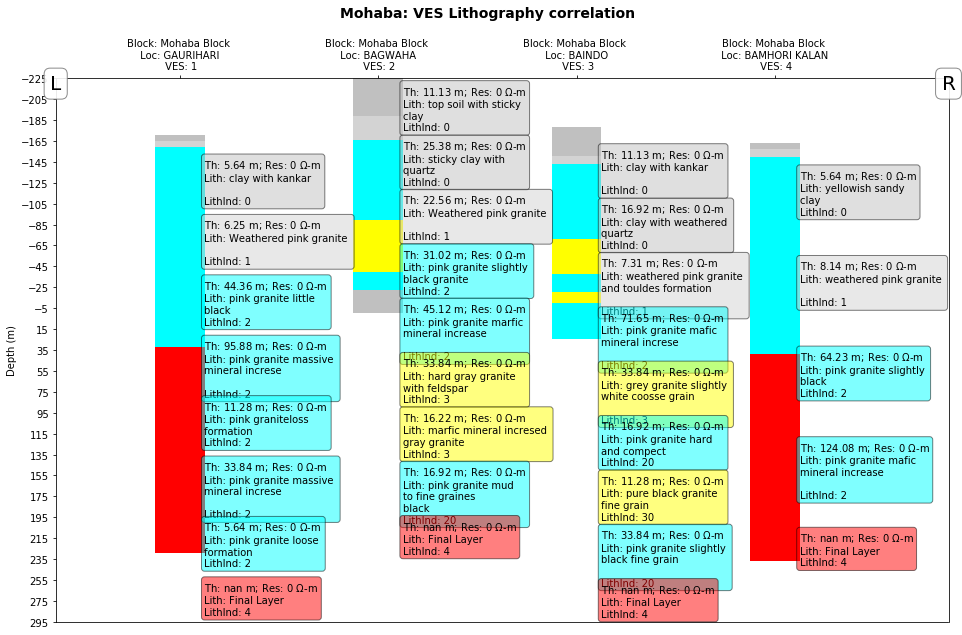

In [473]:
import numpy as np
import pandas as pd
import pickle
# %matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from pickle_fns import *
import math
from scipy.interpolate import griddata,interp2d

def sliceLongString(string,limitLtrsperline):
    if len(string)<limitLtrsperline: return string
    nextstr=''
    lines=[]
    strs=string.split()
    for st in strs:
        nextstr += st+' '
        if len(nextstr)>limitLtrsperline:            
            lines.append(nextstr)
            nextstr=''
    return '\n'.join(lines)+'\n'+nextstr

def str_array2floats(strarray):
    floats=[]
    for s in strarray:
        try:
            floats.append(float(s))
        except:
            floats.append(np.nan)
    return floats
def get_lables(df,lith_dict):
    labels=[]
    for s in df['Interpreted Lithology'].values:
        for i in range(len(lith_dict)):
            if s in lith_dict[i]:
                if i in labels and i!=labels[-1]:
                    labels.append(i*10)
                else:
                    labels.append(i)
                break
    return labels
def make_same_numb_layers(master_l_thicknesses,lith_labels):
    layersinlocations=[len(l) for l in master_l_thicknesses]
    maxls=max(layersinlocations)
    j=-1
    for ml,ll in zip(master_l_thicknesses,lith_labels):
        j +=1
        if len(ml)<maxls:
            for i in range(maxls-len(ml)):
                ml.append(0)
                ll.append(-1)
                # ll.append(-1)
    loc_layers=np.array(master_l_thicknesses)
    return loc_layers,np.array(lith_labels)
# np.set_printoptions(precision=3,
# def get_lithdict():
#         #preparation of lith dictionary
#     fg_undersat=['Fractured Granite, may be under saturation',
#             'Fractured granite , may be under saturation',
#             'Fractured granite, may be under saturation',
#             'Fractured/weathered granite, may be under saturation']
#     gran= ['Granite',]
#     hard_gran=['Hard Granite', 'Hard granite', ]
#     high_weath_gr =['Highly Weathered granite','Highly weathered Granite', 'Highly weathered granite','Soil with kankars/Highly weathered Granite',
#             'Soil/Highly weathered Granite',]
#     soil_w_kankar= ['Overburden/top soil with kankars', 'Soil', 'Soil with kankars', 'Top Soil with kankars',
#             'Top soil', 'Top soil with kankars', 'Top soils with kankars',]
#     weather_gran=[ 'Weathered Granite', 'Weathered granite']
#     return {0:soil_w_kankar,1:high_weath_gr,2:weather_gran,3:gran ,4:fg_undersat,5:hard_gran,}

# vesdf,data_dfs=load_pkl('tikamgarh.pkl')
# vesnos=vesdf['VES No.'].values
# locations4panel=vesnos[0:nlocs]


# plot_VES_panel(vesdf,data_dfs,locations4panel)
def linefy(string):
    string.split()




def get_data4VES_panel(vesdf,data_dfs,lith_dict,locations4panel,max_strata_thickness=400):
    vesnos=list(vesdf['VES No.'].values)
    master_l_thicknesses=[]
    lith_labels=[]
    liths=[]
    
    lith=[]
    res=[]
    thicks=[]
    # E,N=vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float)

    elevations=str_array2floats(vesdf.RL.values)
    ves_data_dfs=[]
    loc_heads=[]
    eles=[]
    for loc in locations4panel:
        indx=vesnos.index(loc)
        a,b,c=tuple(vesdf[['Block','Location','VES No.']].values[indx])
        loc_heads.append('Block: {} \n Loc: {} \n VES: {}'.format(a,b,c) )
        ves_data_dfs.append(data_dfs[indx])
        eles.append(elevations[indx])
    master_l_thicknesses=[]

    for df in ves_data_dfs:
    #     print(df['Thickness(m)'].values.astype(np.float))
        layers_values=str_array2floats(df['Thickness(m)'].values)
        lastlayer_thickness=[max_strata_thickness-np.nansum(layers_values) if math.isnan(x) else x for x in layers_values]
#         print(lastlayer_thickness)
        master_l_thicknesses.append(list(lastlayer_thickness))
        lith_labels.append(list(get_lables(df,lith_dict) ))
        # lith_labels=np.append(lith_labels,df['lith_label'].values,axis=1)
        liths.append(df['Interpreted Lithology'].values)
        res.append(df['Resistivity(Ωm)'].values.astype(np.float))   
        thicks.append(str_array2floats(df['Thickness(m)'].values) ) 

    master_l_thicknesses,lith_labels=make_same_numb_layers(master_l_thicknesses,lith_labels)
    lithologies=np.array(liths)
    resistivities=np.array(res)
    thicknesses=np.array(thicks)
    lith_lbls=np.array(lith_labels)
    ths=np.array(master_l_thicknesses)
    nlocs=ths.shape[0]
    nlayers=ths.shape[1]+1
    vess=np.append(-np.array(eles),ths.T).reshape(nlayers,nlocs)
    return lithologies,resistivities,thicknesses,lith_lbls,vess,loc_heads

def plot_bars(ax,vesBarData,lith_lbls,loc_heads,fcolors,max_strata_thickness):
    nlayers,nlocs=vesBarData.shape
    onevess=vesBarData.T[0]
    _,N = vesBarData.shape
    inds = np.arange(N)    # the x locations for the groups
    width = 0.25      # the width of the bars: can also be len(x) sequence
    p1=[]
    bottom=vesBarData[0]
    for i in range(nlocs):
        onevess=vesBarData.T[i]
        # print(i)
        # print(onevess)
        # print('******************************************************')
        onelbs=lith_lbls[i]
        ind=inds[i]
#         print(onelbs)
        p1.append(ax.bar(ind+width/2,onevess[0], width,color=fcolors[onelbs[0] if onelbs[0]<10 else int(onelbs[0]/10)] ,ecolor='black'))
        bottom = onevess[0]
#         break
        
        for j in range(1,nlayers-1): 
            idx=onelbs[j-1] if onelbs[j-1]<10 else int(onelbs[j-1]/10)
            mycolor=fcolors[idx]
#             print(onevess[j],bottom,mycolor,onelbs[j-1],idx)
            p1.append(ax.bar(ind+width/2,onevess[j], width,bottom=bottom,color=mycolor))
            bottom += onevess[j]
    ax.set_ylabel('Depth (m)')
    ax.set_xticks(inds+width/2, minor=False)
    ax.set_xticklabels( loc_heads, minor=False)
    ax.xaxis.tick_top()
    x_coords=inds+width/2

    # Labels
    xlims=ax.get_xlim()
    ax.set_xlim(-0.5,inds[-1]+1)
    # ylims=ax.get_ylim()
    xlims=ax.get_xlim()
    xspacing=1.0/(nlocs+0.5)
    xwidth=(0.5+width)/(xlims[1]-xlims[0])
    # Placing L,R on both ends of panel

    tystarts=0.99-(np.array(vesBarData[0])-min(vesBarData[0]))/max_strata_thickness
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
    ax.text(0,0.99, "L", ha="center", va="center", size=20,transform=ax.transAxes,
            bbox=bbox_props)
    ax.text(1,0.99, "R", ha="center", va="center", size=20,transform=ax.transAxes,
            bbox=bbox_props)
    return x_coords,inds,width,bottom,tystarts

def hatch_patterns(nlayers,nlocs):
    patterns = ['-', '+', 'x', '\\', '*', 'o', 'O', '.',
                '-', '+', 'x', '\\', '*', 'o', 'O']
    patterns = np.array(patterns[0:nlayers]*nlocs)
    patterns=patterns.reshape(nlocs,nlayers)
    # for bar, pattern in zip(p1, patterns.T.ravel()):
    #     bar.set_hatch(pattern)
def add_lithoDescr(ax,vess,tystarts,lithologies,resistivities,thicknesses,lith_lbls,vesstrans,x_coords,inds,width,bottom,fcolors):
     # Labels
    xlims=ax.get_xlim()
    ax.set_xlim(-0.5,inds[-1]+1)
    # ylims=ax.get_ylim()
    xlims=ax.get_xlim()
    xspacing=1.0/(nlocs+0.5)
    xwidth=(0.5+width)/(xlims[1]-xlims[0])
    tx=0.0+xwidth
    for ty,ls,rs,thks,llb,vs,xc in zip(tystarts,lithologies,resistivities,thicknesses,lith_lbls,vesstrans,x_coords):
        cvs=np.cumsum(vs)   
        adder=10        
#         print(ls)
        
        # ty=0.95
        for i in range(len(ls)):       
            # textstr='R: '+str(int(rs[i]))+'- '+ls[i]+': '+str(ls[i])
            textstr = '\n'.join((
            r'Th: %.2f m; Res: %i $\Omega$-m' % (thks[i],rs[i], ),
            r'Lith: %s' % ( sliceLongString(ls[i],15), ),
            r'LithInd: %i' % (llb[i], )))
#             print(textstr)
            idx=llb[i] if llb[i]<10 else llb[i]/10
            props = dict(boxstyle='round', facecolor=fcolors[int(idx)], alpha=0.5) #-0.6/nlocs
            ax.text(tx, ty, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props) 

            ty -=1/(len(ls)+1)

            adder+=20
        tx +=xspacing
    ax.set_yticks(np.arange(min(vess[0,:]), bottom+60, 20))
    # ax.legend(p1, layers,loc=4)
    ax.invert_yaxis()  
    
def plot_VES_panel(vesdf,data_dfs,lith_dict,locations4panel,figsize):
    max_strata_thickness=400
    lithologies,resistivities,thicknesses,lith_lbls,vess,loc_heads=get_data4VES_panel(vesdf,data_dfs,lith_dict,locations4panel,max_strata_thickness=max_strata_thickness)
    colors=['#C0C0C0','#D3D3D3',	'#00FFFF',	'#FFFF00','#FF0000',	'#00FF00',	'#008000',	'#0000FF','#808000','#800000',		'#008080',		'#000080',	'#FF00FF',	'#800080']
    nlayers,nlocs=vess.shape
    fcolors=colors[0:nlayers+1]  
    vesBarData = vess.copy()

    fig = plt.figure(figsize=(figsize))
    fig.suptitle('{}: VES Lithography correlation'.format(vesdf.iloc[0].Distt), fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)

    x_coords,inds,width,bottom,tystarts=plot_bars(ax,vesBarData,lith_lbls,loc_heads,fcolors,max_strata_thickness)

    hatch_patterns(nlayers,nlocs)


    add_lithoDescr(ax,vess,tystarts,lithologies,resistivities,thicknesses,lith_lbls,vess.T,x_coords,inds,width,bottom,fcolors)
    
    return plt   

base_folder=r'D:\Ameyem Office\Projects\Electric surveys\Easwar files\Mahoba\\'
vesdf,data_dfs=load_pkl(base_folder+'dvesdf_datadf.pkl')
# vesdf,data_dfs=load_pkl('tikamgarh.pkl')
# lith_dict=load_pkl(base_folder+'lith_dict.pkl')
lith_dict=get_lithdict()
vesnos=vesdf['VES No.'].values
# print(vesnos)
nlocs=4
locations4panel=[1 ,2,3,4];file1='test1.jpg'
# locations4panel=['187', '184', '175', '146', '136', '148', '112', '122', '113', '158', '155', '164', '154'];file1='test2.jpg'
figsize=4*len(locations4panel[0:nlocs]),10

# locations4panel=['669','670', '668', '661', '662']
plt=plot_VES_panel(vesdf,data_dfs,lith_dict,locations4panel[0:nlocs],figsize)
plt.savefig(file1, dpi=150)
plt.show()
    
# if __name__ == '__main__':
#     base_folder=r'D:\Ameyem Office\Projects\Electric surveys\Easwar files\Mahoba\\'
#     vesdf,data_dfs=load_pkl(base_folder+'vesdf_datadf.pkl')
#     # vesdf,data_dfs=load_pkl('tikamgarh.pkl')
#     lith_dict=load_pkl(base_folder+'lith_dict.pkl')
#     vesnos=vesdf['VES No.'].values
#     # print(vesnos)
#     nlocs=4
#     locations4panel=['128' ,'129', '130', '131', '132','133'];file1='test1.jpg'
#     locations4panel=['187', '184', '175', '146', '136', '148', '112', '122', '113', '158', '155', '164', '154'];file1='test2.jpg'
#     figsize=4*len(locations4panel[0:nlocs]),10

#     # locations4panel=['669','670', '668', '661', '662']
#     plt=plot_VES_panel(vesdf,data_dfs,lith_dict,locations4panel[0:nlocs],figsize)
#     plt.savefig(file1, dpi=150)
#     plt.show()

In [474]:
max_strata_thickness=400
lithologies,resistivities,thicknesses,lith_lbls,vess,loc_heads=get_data4VES_panel(vesdf,data_dfs,lith_dict,locations4panel,max_strata_thickness=max_strata_thickness)
colors=['#C0C0C0','#D3D3D3',	'#00FFFF',	'#FFFF00','#FF0000',	'#00FF00',	'#008000',	'#0000FF','#808000','#800000',		'#008080',		'#000080',	'#FF00FF',	'#800080']
nlayers,nlocs=vess.shape
fcolors=colors[0:nlayers+1]
resistivities,thicknesses,lith_lbls,vess,loc_heads

(array([array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
        array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
        array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
        array([ 0.,  0.,  0.,  0.,  0.])], dtype=object),
 array([[5.64, 6.25, 44.36, 95.88, 11.28, 33.84, 5.64, nan],
        [11.13, 25.38, 22.56, 31.02, 45.12, 33.84, 16.22, 16.92, nan],
        [11.13, 16.92, 7.31, 71.65, 33.84, 16.92, 11.28, 33.84, nan],
        [5.64, 8.14, 64.23, 124.08, nan]], dtype=object),
 array([[ 0,  1,  2,  2,  2,  2,  2,  4, -1],
        [ 0,  0,  1,  2,  2,  3,  3, 20,  4],
        [ 0,  0,  1,  2,  3, 20, 30, 20,  4],
        [ 0,  1,  2,  2,  4, -1, -1, -1, -1]]),
 array([[-171.  , -225.  , -178.6 , -163.  ],
        [   5.64,   11.13,   11.13,    5.64],
        [   6.25,   25.38,   16.92,    8.14],
        [  44.36,   22.56,    7.31,   64.23],
        [  95.88,   31.02,   71.65,  124.08],
        [  11.28,   45.12,   33.84,  197.91],
        [  33.84,   33.84,   16.92,    

In [249]:
def get_lables(df,lith_dict):
    labels=[]
    for s in df['Interpreted Lithology'].values:
        for i in range(len(lith_dict)):
            if s in lith_dict[i]:
                if i in labels and i!=labels[-1]:
                    labels.append(i*10)
                else:
                    labels.append(i)
                print(s,i)
                break
                
    return labels
labels=[]
for df in data_dfs[0:1]:
    labels.append(get_lables(df,lith_dict))
#     print(len(df),len(get_lables(df,lith_dict)))
#     brea
labels

Soil with slay 0
Course sand 1
Weathered pink granite 1
pink granite(hard and compact) 3
pink granite slightly black fine to medium 4
Pink granite compressivelyless mafic 5
Final Layer 6


[[0, 1, 1, 3, 4, 5, 6]]

In [410]:
# data_dfs[0]

In [409]:
# all_lith=[]
# for j in lith_dict:
#     all_lith.extend(lith_dict[j] )
# all_lith
# lith_dict